# plant.Watering Prediction Model

## Problem Statement
We should predict the water consumption according to weather data

## Import all libraries

In [1]:
# Show Plot immedeately
%matplotlib inline 

from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import pymysql.cursors
import pandas as pd
from datetime import datetime
from sklearn import linear_model

/usr/local/lib/python3.4/dist-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


## Import DataSet

In [2]:
r_DataSet = pd.read_csv("plant.Watering.data/DataSet.csv")

## Variables

Variable | Description
------------- |-------------|
Date          |   29 non-null object
Value         |   Pump Duration (predicted variable)29 non-null float64
Time          |   29 non-null object
DateTime_x    |   29 non-null object
DateTime_y    |   29 non-null object
tre200b0      |   Lufttemperatur 2 m über Boden; Stundenmittel 24h ago °C (tre200b0)
ure200b0      |   Relative Luftfeuchtigkeit 2 m über Boden; Stundenmittel 24h ago % (ure200b0)
rre150b0      |   Niederschlag; Stundensumme 24h ago mm (rre150b0)
sre000b0      |   Sonnenscheindauer; Stundensumme 24h ago min (sre000b0)
fu3010b0      |   Windgeschwindigkeit skalar; Stundenmittel 24h ago km/h (fu3010b0)
prestab0      |   24h-Mean Luftdruck auf Stationshöhe (QFE); Stundenmittel (from -48h to -24h) hPa (prestab0)
tre200b0_mean |   24h-Mean Lufttemperatur 2 m über Boden; Stundenmittel (from -48h to -24h) °C (tre200b0)
ure200b0_mean |  24h-Mean Relative Luftfeuchtigkeit 2 m über Boden; Stundenmittel (from -48h to -24h) % (ure200b0)
rre150b0_sum  |   24h-Summe Niederschlag; Stundensumme (from -48h to -24h) mm (rre150b0)
sre000b0_sum  |  24h-Summe Sonnenscheindauer; Stundensumme (from -48h to -24h) min (sre000b0)
fu3010b0_mean |   24h-Mean Windgeschwindigkeit skalar; Stundenmittel (from -48h to -24h) km/h (fu3010b0)
prestab0_mean |   24h-Mean Luftdruck auf Stationshöhe (QFE); Stundenmittel (from -48h to -24h) hPa (prestab0)

In [3]:
# Print more than one variable
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

r_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
Date             93 non-null object
Value            93 non-null float64
tre200b0         93 non-null float64
ure200b0         93 non-null float64
rre150b0         93 non-null float64
sre000b0         93 non-null float64
fu3010b0         93 non-null float64
prestab0         93 non-null float64
tre200b0_mean    93 non-null float64
ure200b0_mean    93 non-null float64
rre150b0_sum     93 non-null float64
sre000b0_sum     93 non-null float64
fu3010b0_mean    93 non-null float64
prestab0_mean    93 non-null float64
dtypes: float64(13), object(1)
memory usage: 10.2+ KB


## Neural Network

In [4]:
from sklearn.preprocessing import PolynomialFeatures

#r_DataSet = r_DataSet[(r_DataSet.Value > 100) & (r_DataSet.Value != 480) & (r_DataSet.Value < 800)]
#r_DataSet = r_DataSet[(r_DataSet.Value > 350) & (r_DataSet.Value < 600) & (r_DataSet.Value != 480)]
#r_DataSet = r_DataSet[(r_DataSet.Value < 100)]
#r_DataSet = r_DataSet[(r_DataSet.Value > 600)]

#r_DataSet.info()
#r_DataSet.describe()

r_DataSet.describe()

,Value,tre200b0,ure200b0,rre150b0,sre000b0,fu3010b0,prestab0,tre200b0_mean,ure200b0_mean,rre150b0_sum,sre000b0_sum,fu3010b0_mean,prestab0_mean
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.00000,93.000000,93.000000,93.000000,9.300000e+01,93.000000,93.000000,93.000000
mean,515.066925,16.277419,71.406452,0.294624,6.989247,8.06129,959.473118,15.309498,74.820475,3.567742e+00,389.075269,6.353136,959.692204
std,300.580289,6.980674,14.918990,1.091605,14.993110,5.51153,5.290088,6.423428,10.432328,8.253710e+00,295.377365,2.429643,4.545921
min,1.909000,0.200000,41.100000,0.000000,0.000000,0.00000,938.800000,0.550000,44.041667,2.386980e-15,0.000000,2.358333,947.320833
25%,340.955000,12.500000,58.600000,0.000000,0.000000,4.00000,957.000000,12.520833,68.283333,6.836198e-14,93.000000,4.975000,957.583333
50%,480.000000,17.800000,72.200000,0.000000,0.000000,7.60000,960.000000,17.100000,75.433333,1.000000e-01,379.000000,5.925000,959.841667
75%,675.567000,21.700000,83.800000,0.000000,4.000000,10.40000,962.000000,19.833333,83.575000,4.100000e+00,683.000000,7.204167,962.220833
max,1271.000000,27.200000,95.800000,6.400000,60.000000,31.00000,971.500000,24.341667,93.070833,5.100000e+01,886.000000,15.500000,971.366667


### Divide DataSet into TrainingSet (60%) and TestSet (100%) and Define Training Variable (y) and Explanation Variables (X)

In [5]:
p_TrainSet = r_DataSet.sample(frac=0.6, replace=True)
p_TestSet = r_DataSet.sample(frac=1, replace=True)

Xtrain = p_TrainSet.loc[:,"tre200b0":]

yTrain = p_TrainSet.Value
yTest = p_TestSet.Value

# Test Model, get X and y from TestSet
Xtest = p_TestSet.loc[:,"tre200b0":]

### Train Neural Network

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Mean squared error: 570826719470230307244654353605718291099024325466914816.00
Variance score: -2718933971291738520640197692989588768138469500939667794213279208977626904171304136284285498089220866048.00


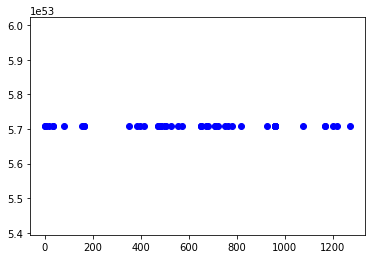

In [6]:
from sklearn.neural_network import MLPRegressor 

reg = MLPRegressor(hidden_layer_sizes = (10, 10,10, ), solver = 'sgd')

reg.fit(Xtrain, yTrain)

# The coefficients
#print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((reg.predict(Xtrain) - yTrain) ** 2) ** 0.5)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(Xtrain, yTrain))

# Plot outputs
plt.scatter(yTrain, reg.predict(Xtrain), color='blue')

plt.show()

Variance score: 0.47


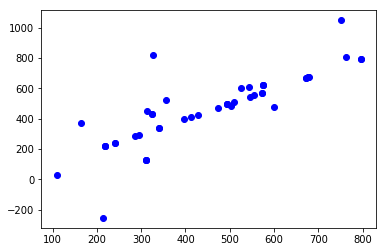

In [164]:
from sklearn.externals import joblib
#joblib.dump(regr, 'lr_medium_values.pkl', compress=9)

model_clone = regr
#model_clone = joblib.load('lr_medium_values.pkl')

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model_clone.score(Xtest, yTest))
plt.scatter(yTest, model_clone.predict(Xtest), color='blue')
plt.show()

In [165]:
#Save the model
#joblib.dump(regr, 'plant.Watering.data/linreg_med_5deg.pkl')

['plant.Watering.data/linreg_med_5deg.pkl']

#### Port your model to other languages
Very good source for porting pkl (Pickle) Files to other langauges
https://github.com/nok/sklearn-porter

### Should I give some water or not (logistic regression)

In [60]:
l_DataSet = r_DataSet
l_DataSet.loc[r_DataSet.Value < 100, "Value"] = 0
l_DataSet.loc[r_DataSet.Value >= 100, "Value"] = 1

l_TrainSet = l_DataSet.sample(frac=0.6, replace=True)
l_TestSet = l_DataSet.sample(frac=1, replace=True)



X = l_TrainSet.loc[:,"tre200b0":]
X = PolynomialFeatures(degree=3).fit_transform(X).astype(int)

y = l_TrainSet.Value

from sklearn.linear_model import LogisticRegression
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()

model = model.fit(X, y)

# check the accuracy on the training set
model = model.score(PolynomialFeatures(degree=3).
            fit_transform(X, y))


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0

In [ ]:
# The coefficients
#print('Coefficients: \n', model.coef_)

r = (model.predict(PolynomialFeatures(degree=3).
              fit_transform(l_TestSet.loc[:,"tre200b0":]).
              astype(int)) - l_TestSet.Value) ** 2

r.sum()

In [ ]:
r = (model.predict(PolynomialFeatures(degree=3).
              fit_transform(l_TestSet.loc[:,"tre200b0":]).
              astype(int)) - l_TestSet.Value) ** 2